# Part I - California Plants (2001 - 2015) Exploratory Analysis
## by Ahmad Anifowose
## Introduction
This document explores a dataset containing power plants in California, their capacities and net generation to the grid from 2001 to 2015.
## Preliminary Wrangling


In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [4]:
# load the dataset
cal_plants = pd.read_csv('C:/Users/USER/Documents/Python_Scripts/Udacity_Course/Projects/data_visualization_project/datasets/California Electricity Capacity/plants-california.csv')

# explore the dataset by viewing the first 12 observations
cal_plants.head()

,year,plant_id,plant_name_gen,operator_name_gen,operator_id_gen,net_generation_mwh,plant_name_cap,operator_name_cap,operator_id_cap,state,nameplate_mw,summer_mw,capacity_mwh,capacity_utilization,minimum_year
0,2011,57310,1420 Coil Av #C,Los Angeles Department of Water & Power,11208.0,1992.0,1420 Coil Av #C,Los Angeles Department of Water & Power,11208,CA,1.1,1.2,10512.0,0.189498,2011.0
1,2012,57310,1420 Coil Av #C,Los Angeles Department of Water & Power,11208.0,2173.0,1420 Coil Av #C,Los Angeles Department of Water & Power,11208,CA,1.1,1.2,10512.0,0.206716,2011.0
2,2013,57310,1420 Coil Av #C,Los Angeles Department of Water & Power,11208.0,1528.0,1420 Coil Av #C,Los Angeles Department of Water & Power,11208,CA,1.1,1.2,10512.0,0.145358,2011.0
3,2014,57310,1420 Coil Av #C,Los Angeles Department of Water & Power,11208.0,2149.0,1420 Coil Av #C,Los Angeles Department of Water & Power,11208,CA,1.1,1.3,11388.0,0.188707,2011.0
4,2015,57310,1420 Coil Av #C,Los Angeles Department of Water & Power,11208.0,1515.0,1420 Coil Av #C,Los Angeles Department of Water & Power,11208,CA,1.3,1.3,11388.0,0.133035,2011.0


### Data Wrangling Section:
>It is important to get to know and understand the data before analyzing and visualizing.

In [5]:
# get the shape (dimension) of the dataset
cal_plants.shape

(12631, 15)

In [6]:
# get the data types of the dataset
cal_plants.dtypes

year                      int64
plant_id                  int64
plant_name_gen           object
operator_name_gen        object
operator_id_gen         float64
net_generation_mwh      float64
plant_name_cap           object
operator_name_cap        object
operator_id_cap           int64
state                    object
nameplate_mw            float64
summer_mw               float64
capacity_mwh            float64
capacity_utilization    float64
minimum_year            float64
dtype: object

##### A few columns have data types that would not be fit for this analyses, hence the data types will be changed. The columns are listed below:
>1. plant_id: int to string
>2. operator_id_gen: float to string
>3. operator_id_cap: float to string
>4. minimum_year: float to string

In [7]:
# make copy of original dataset.
cal_plants_clean = cal_plants.copy()

In [8]:
# code to change the 5 identified data type issues

cal_plants_clean['plant_id'] = cal_plants_clean['plant_id'].astype(str)

cal_plants_clean['operator_id_gen'] = cal_plants_clean['operator_id_gen'].astype(str)

cal_plants_clean['operator_id_cap'] = cal_plants_clean['operator_id_cap'].astype(str)

cal_plants_clean['minimum_year'] = cal_plants_clean['minimum_year'].astype(str)

# code to confirm the issues have been resolved
cal_plants_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12631 entries, 0 to 12630
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  12631 non-null  int64  
 1   plant_id              12631 non-null  object 
 2   plant_name_gen        12048 non-null  object 
 3   operator_name_gen     12048 non-null  object 
 4   operator_id_gen       12631 non-null  object 
 5   net_generation_mwh    12048 non-null  float64
 6   plant_name_cap        12631 non-null  object 
 7   operator_name_cap     12630 non-null  object 
 8   operator_id_cap       12631 non-null  object 
 9   state                 12631 non-null  object 
 10  nameplate_mw          12631 non-null  float64
 11  summer_mw             12631 non-null  float64
 12  capacity_mwh          12631 non-null  float64
 13  capacity_utilization  12048 non-null  float64
 14  minimum_year          12631 non-null  object 
dtypes: float64(5), int6

In [9]:
# code for descriptive statistics of the data
cal_plants_clean.describe()

,year,net_generation_mwh,nameplate_mw,summer_mw,capacity_mwh,capacity_utilization
count,12631.000000,1.204800e+04,12631.000000,12631.000000,1.263100e+04,1.204800e+04
mean,2008.679756,2.489280e+05,85.016950,79.421503,6.957324e+05,inf
std,4.413501,9.946251e+05,247.063013,232.171052,2.033818e+06,NaN
min,2001.000000,-4.506400e+05,0.300000,0.000000,0.000000e+00,-2.533454e-01
25%,2005.000000,8.512750e+03,4.400000,4.000000,3.504000e+04,1.649669e-01
50%,2009.000000,3.821550e+04,18.700000,17.000000,1.489200e+05,3.320873e-01
75%,2013.000000,1.749002e+05,50.000000,48.000000,4.204800e+05,6.614811e-01
max,2015.000000,1.858849e+07,2802.000000,2680.280000,2.347925e+07,inf


##### From the descriptive statistics above, it was observed that:

>The net_generation_mwh column has a negative minimum value.
It's pretty interesting to find out California has some power plants 
that consumed electricity from the California grid more than they generated.
to this end, it would be instructive to know the plants that fall in this category.


In [10]:
# code to get plants with negative net_generation_mwh
cal_plants_clean[cal_plants_clean['net_generation_mwh'] < 0]

,year,plant_id,plant_name_gen,operator_name_gen,operator_id_gen,net_generation_mwh,plant_name_cap,operator_name_cap,operator_id_cap,state,nameplate_mw,summer_mw,capacity_mwh,capacity_utilization,minimum_year
754,2008,56346,Bear Valley Power Plant,Golden State Water Company,54710.0,-224.0,Bear Valley Power Plant,Golden State Water Company,54710,CA,8.4,7.7,67452.0,-0.003321,2005.0
757,2011,56346,Bear Valley Power Plant,Golden State Water Company,54710.0,-205.0,Bear Valley Power Plant,Golden State Water Company,54710,CA,8.4,7.7,67452.0,-0.003039,2005.0
1150,2014,328,Borel,Southern California Edison Co,17609.0,-209.0,Borel,Southern California Edison Co,17609,CA,12.0,10.6,92856.0,-0.002251,1904.0
1151,2015,328,Borel,Southern California Edison Co,17609.0,-221.0,Borel,Southern California Edison Co,17609,CA,12.0,10.6,92856.0,-0.002380,1904.0
1663,2001,392,Castaic,Los Angeles City of,11208.0,-49012.0,Castaic,Los Angeles City of,11208,CA,1331.0,1495.0,13096200.0,-0.003742,1972.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11484,2011,448,W R Gianelli,California Dept. of Water Resources,3255.0,-287497.0,W R Gianelli,California Department of Water Resource,3255,CA,424.0,401.0,3512760.0,-0.081844,1967.0
11487,2014,448,W R Gianelli,California Dept. of Water Resources,3255.0,-142409.0,W R Gianelli,California Dept. of Water Resources,3255,CA,424.0,401.0,3512760.0,-0.040540,1967.0
11488,2015,448,W R Gianelli,California Dept. of Water Resources,3255.0,-26449.0,W R Gianelli,California Dept. of Water Resources,3255,CA,424.0,401.0,3512760.0,-0.007529,1967.0
11526,2013,4256,Walnut,Turlock Irrigation District,19281.0,-110.0,Walnut,Turlock Irrigation District,19281,CA,49.8,47.0,411720.0,-0.000267,1986.0


In [11]:
# code to get number of null values for capacity utilization
cal_plants_clean['capacity_utilization'].isnull().sum()

583

In [12]:
# code for descriptive statistics of the dataset
cal_plants_clean.describe()

,year,net_generation_mwh,nameplate_mw,summer_mw,capacity_mwh,capacity_utilization
count,12631.000000,1.204800e+04,12631.000000,12631.000000,1.263100e+04,1.204800e+04
mean,2008.679756,2.489280e+05,85.016950,79.421503,6.957324e+05,inf
std,4.413501,9.946251e+05,247.063013,232.171052,2.033818e+06,NaN
min,2001.000000,-4.506400e+05,0.300000,0.000000,0.000000e+00,-2.533454e-01
25%,2005.000000,8.512750e+03,4.400000,4.000000,3.504000e+04,1.649669e-01
50%,2009.000000,3.821550e+04,18.700000,17.000000,1.489200e+05,3.320873e-01
75%,2013.000000,1.749002e+05,50.000000,48.000000,4.204800e+05,6.614811e-01
max,2015.000000,1.858849e+07,2802.000000,2680.280000,2.347925e+07,inf


### What is the structure of your dataset?

> The dataset has 12631 rows, and 15 columns with float(5), and object(10) datatypes
> There are 12631 observations in the dataset with 15 features (year, plant_id, plant_name_gen, operator_name_gen, operator_id_gen, net_generation_mwh,	plant_name_cap,	operator_name_cap, operator_id_cap, state, nameplate_mw, summer_mw, capacity_mwh, capacity_utilization, minimum_year).
> It has five numeric variables (net_generation_mwh, nameplate_mw, summer_mw, capacity_mwh, capacity_utilization).


### What is/are the main feature(s) of interest in your dataset?

> My main interest is to determine how various plants contributes onto the California electricity grid.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The nameplate_mw is a major feature of the dataset, infact, it'd be split into 5 various categories: very_small, small, medium, large, very_large.

## Univariate Exploration

Here, several charts will be plotted including histogram, bar chart, and pie chart.

### What is the net generation (MWh) of the plants?

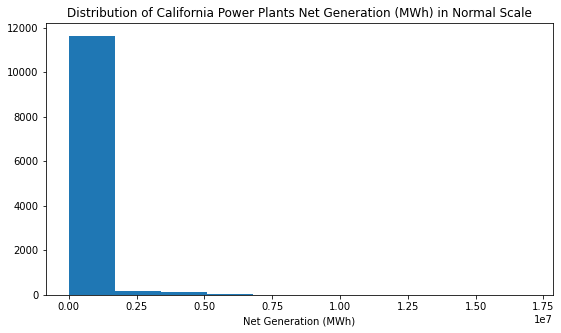

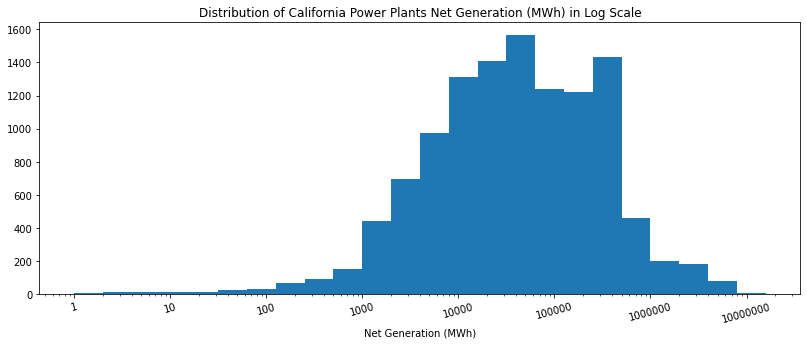

In [13]:
# set the bins for the chart
bins = np.arange(0, cal_plants_clean['net_generation_mwh'].max()+10000, 1700000)

plt.figure(figsize=[20, 5])
plt.subplot(1, 2, 1)
plt.hist(data = cal_plants_clean, x = 'net_generation_mwh', bins=bins)
plt.xlabel('Net Generation (MWh)')
plt.title('Distribution of California Power Plants Net Generation (MWh) in Normal Scale')

# Generate the x-ticks to apply
ticks = [1, 10, 100, 1000, 10000, 100000, 1000000, 10000000]
# Convert ticks into string values, to be displaye dlong the x-axis
labels = ['{}'.format(v) for v in ticks]

bins = 10 ** np.arange(0, 7+0.5, 0.3)
plt.figure(figsize=[30, 5])
plt.subplot(1, 2, 2)
plt.hist(data = cal_plants_clean, x = 'net_generation_mwh', bins=bins)
plt.xlabel('Net Generation (MWh)')
plt.xscale('log')
plt.title('Distribution of California Power Plants Net Generation (MWh) in Log Scale')
plt.xticks(rotation=15)

# Apply x-ticks
plt.xticks(ticks, labels);

The visualization in the log scale is clearer than the normal scale. It can be obsserved that a few plants had very large contributions to the California Electicity Grid, while some contributed only a paltry.

### How do the plants vary in capacity?

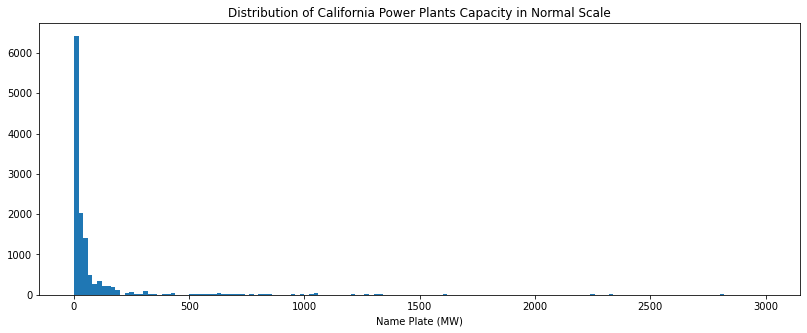

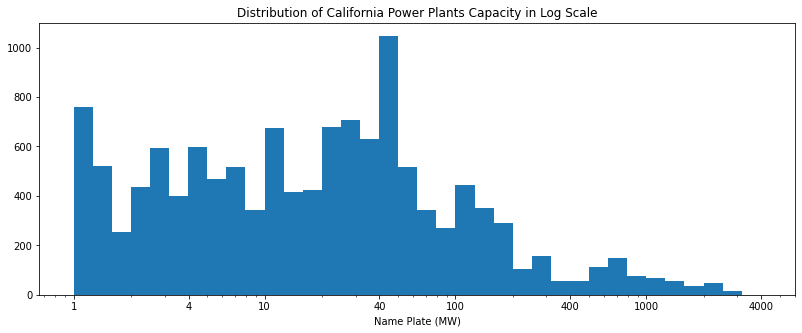

In [14]:
bins = np.arange(0, cal_plants_clean['nameplate_mw'].max()+200, 20)
plt.figure(figsize=[30, 5])
plt.subplot(1, 2, 1)
plt.hist(data = cal_plants_clean, x = 'nameplate_mw', bins=bins)
plt.xlabel('Name Plate (MW)')
plt.title('Distribution of California Power Plants Capacity in Normal Scale')

# Generate the x-ticks to apply
ticks = [1, 4, 10, 40, 100, 400, 1000, 4000]
# Convert ticks into string values, to be displaye dlong the x-axis
labels = ['{}'.format(v) for v in ticks]

bins = 10 ** np.arange(0, 3+0.7, 0.1)
plt.figure(figsize=[29.8, 5])
plt.subplot(1, 2, 2)
plt.hist(data = cal_plants_clean, x = 'nameplate_mw', bins=bins)
plt.xlabel('Name Plate (MW)')
plt.xscale('log')
plt.title('Distribution of California Power Plants Capacity in Log Scale')

# Apply x-ticks
plt.xticks(ticks, labels);

The plots above show the distribution of the California power plants nameplate capacity. From this image, it can be deduced that majority of the power plants in  California have capacities ranging from 1 MW to 200 MW. The numbers begin to decline significantly from about 1,000 MW and above.

### Which companies operated the least capacity power plants

Text(0, 0.5, 'Operator Name')

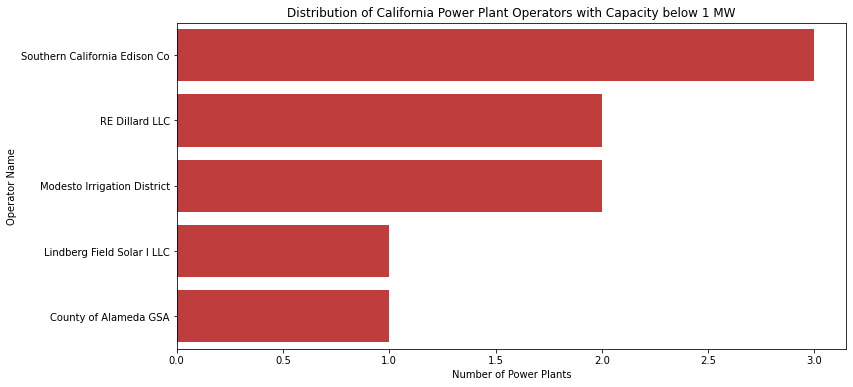

In [33]:
# firstly, query out the plants with nameplate capacity less than 1MW.
below_1 = cal_plants_clean[cal_plants_clean['nameplate_mw'] < 1]

name_counts = below_1['operator_name_gen'].value_counts()

name_order = name_counts.index

# set bar chat color
default_color = sb.color_palette()[3]
color = sb.color_palette()[0]

plt.figure(figsize=[12, 6])
sb.countplot(data = below_1, y='operator_name_gen', order = name_order, color = default_color)
plt.title('Distribution of California Power Plant Operators with Capacity below 1 MW')
plt.xlabel('Number of Power Plants')
plt.ylabel('Operator Name')



Interestingly, there are a some power plants less than 1 MW, with Southern California Edison Co being the largest operator of that category of power plants.

### Which companies operated the power plants with capacity above 2,000 MW.

Text(0, 0.5, 'Operator Name')

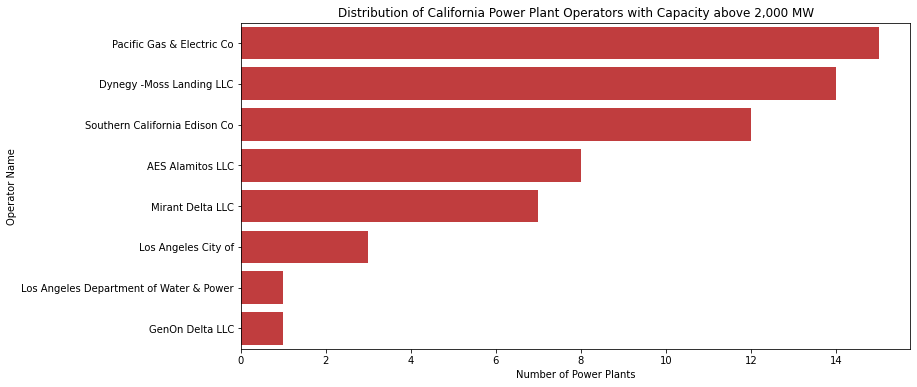

In [16]:
above_2000 = cal_plants_clean[cal_plants_clean['nameplate_mw'] > 2000]

name_counts = above_2000['operator_name_gen'].value_counts()

name_order = name_counts.index

default_color = sb.color_palette()[3]

plt.figure(figsize=[12, 6])
sb.countplot(data = above_2000, y='operator_name_gen', order = name_order, color = default_color)
plt.title('Distribution of California Power Plant Operators with Capacity above 2,000 MW')
plt.xlabel('Number of Power Plants')
plt.ylabel('Operator Name')



The bar chart above shows the distribution of companies operating power plants larger than 2,000 MW. GenOn Delta LLC has just one power plant, while Pacific Gas & Electric Co has 15 plants in this category.

### How many plants fall into these categories: very_small, small, medium, large, and very large?

Text(0, 0.5, 'Number of Power Plants')

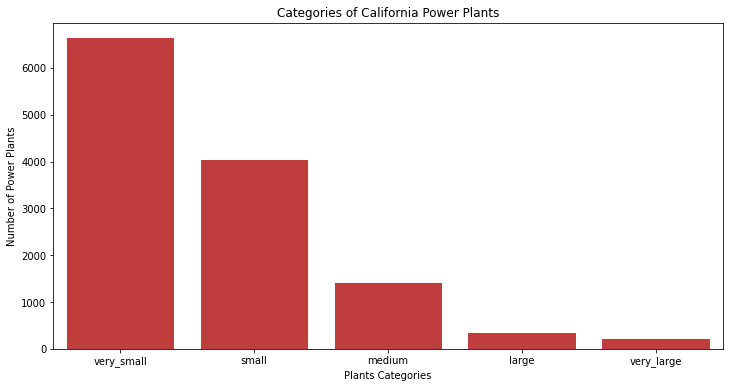

In [17]:
bins= [0, 20, 100, 500, 1000, 4000] 

labels = ['very_small', 'small', 'medium', 'large', 'very_large']

cal_plants_clean['plant_size'] = pd.cut(x = cal_plants_clean['nameplate_mw'], bins = bins, labels = labels)

plt.figure(figsize=[12, 6])
sb.countplot(data = cal_plants_clean, x='plant_size', color = default_color)
plt.title('Categories of California Power Plants')
plt.xlabel('Plants Categories')
plt.ylabel('Number of Power Plants')

The dataset has quite a large number of plants in the very_small range. The numbers begin to decline as the capacity rises.

### What percentage do these categories represent?

Text(0.5, 1.0, 'A Donut Chart of the Percentage Values of Plant Size')

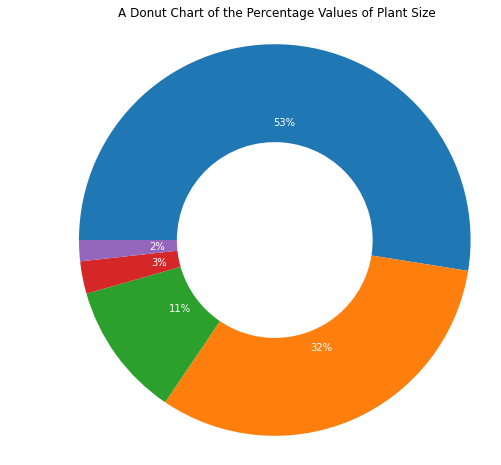

In [18]:
plt.figure(figsize=[12, 8])
sorted_counts = cal_plants_clean['plant_size'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 180,
        counterclock = False, autopct='%1.0f%%',textprops={'color':"w"}, wedgeprops = {'width' : 0.5});
plt.axis('square')

plt.title("A Donut Chart of the Percentage Values of Plant Size")

The plot shows that the very small plants consists of about 53%, the small plants are 32%, medium, 11%, large, 3%, and very large, 2%.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Both the distribution of California Power Plants Net Generation (MWh) and distribution of Nameplate Capacity were not clear until they were plotted in Log Scale. From the charts, it was observed that there is a pretty large number of power plants with nameplate capacity ranging from 1 to 150 MW, and a very few number of large power plants.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Due to the pretty large distribution of the dataset, I categorized the power plants into various sizes as follows:

> 1. Very Small: 0 - 20 MW
> 2. Small: 20 - 100 MW
> 3. Medium: 100 - 500 MW
> 4. Large: 500 - 1,000 MW
> 5. Very Large: 1,000 - 4,000 MW

> This was used to create a column in the dataset, and then plotted accordingly. The plot shows that the very small plants consists of about 53%, the small plants are 32%, medium, 11%, large, 3%, and very large, 2%.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

#### How does a year's net generation compare with that of the previous year?

Text(0.5, 1.0, 'A Plot of Net Generation (MWh) on a Yearly Basis')

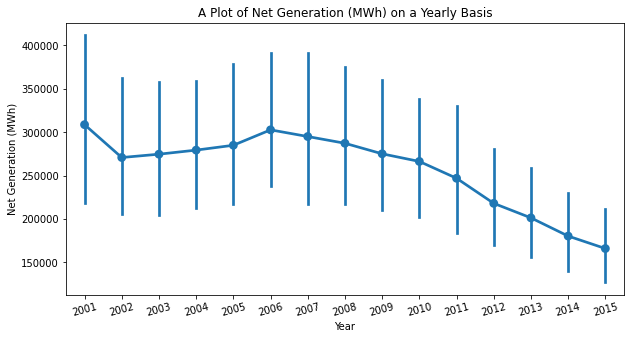

In [19]:
plt.figure(figsize= [10,5])
sb.pointplot(data = cal_plants_clean, x = 'year', y = 'net_generation_mwh');
plt.xlabel('Year')
plt.ylabel('Net Generation (MWh)')
plt.xticks(rotation=15);
plt.title("A Plot of Net Generation (MWh) on a Yearly Basis")

Net Generation (MWh) typically improved from 2002 on a yearly basis until it peaked in 2006, and began to decline up till 2015

### What is the relationship between the plants nameplate capacity (MW) and net generation (MWh)

Text(0.5, 1.0, 'A Plot of Net Generation (MWh) against Nameplate (MW)')

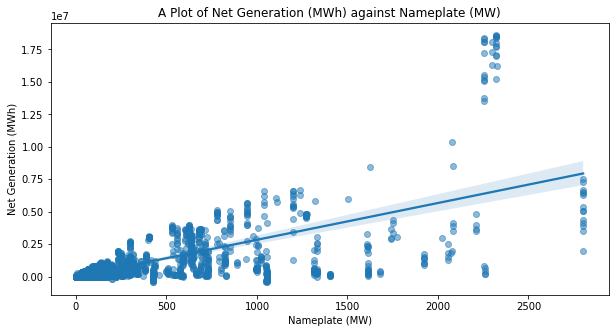

In [74]:
plt.figure(figsize= [10,5])
sb.regplot(data = cal_plants_clean, x = 'nameplate_mw', y = 'net_generation_mwh', x_jitter = 0.5, y_jitter=0.5
, scatter_kws={'alpha':1/2});
plt.xlabel('Nameplate (MW)')
plt.ylabel('Net Generation (MWh)')
plt.title("A Plot of Net Generation (MWh) against Nameplate (MW)")

From the plot above, it can be deduced that the power plants with the highest net generation (MWh) have a pretty large capacity of about 2,300 MW compared to the remaining plants.

### What is the relationship between the plants nameplate capacity (MW) and summer capacity (MW)

Text(0.5, 1.0, 'A Plot of Summer (MW) against Nameplate (MW)')

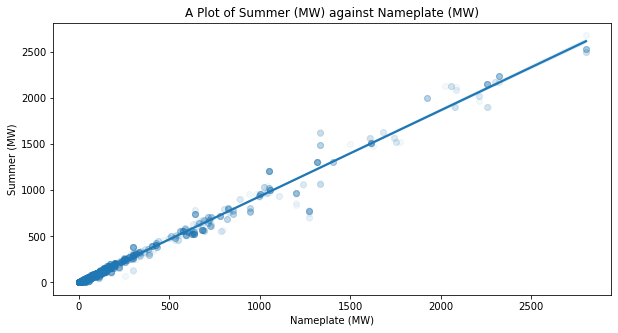

In [76]:
plt.figure(figsize= [10,5])
sb.regplot(data = cal_plants_clean, x = 'nameplate_mw', y = 'summer_mw', x_jitter = 0.5, y_jitter=0.5
, scatter_kws={'alpha':1/20});
plt.xlabel('Nameplate (MW)')
plt.ylabel('Summer (MW)')
plt.title("A Plot of Summer (MW) against Nameplate (MW)")

This is a pretty direct relationship. The summer capacity is almost equal to the nominal nameplate capcity.

### What is the relationship between the plants capacity (MWh) and summer capacity (MW)

Text(0.5, 1.0, 'A Plot of Capacity (MWh) against Summer (MW)')

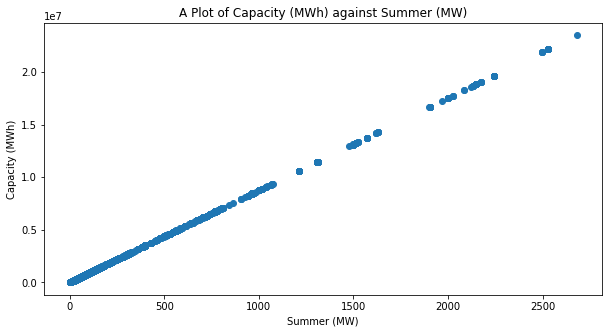

In [82]:

plt.figure(figsize= [10,5])
plt.scatter(data = cal_plants_clean, x = 'summer_mw', y = 'capacity_mwh');
plt.ylabel('Capacity (MWh)')
plt.xlabel('Summer (MW)')
plt.title("A Plot of Capacity (MWh) against Summer (MW)")


The capacity (MWh), and summer (MW) is also highly correlated.

Text(0.5, 1.0, 'Two-Dimensional Histogram of Nameplate (MW) and Summer (MW) ')

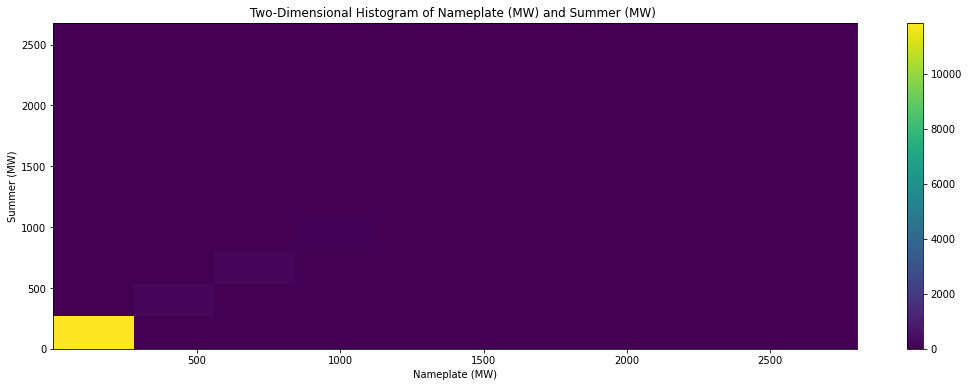

In [23]:
plt.figure(figsize = [18, 6])

plt.hist2d(data = cal_plants_clean, x = 'nameplate_mw', y = 'summer_mw')
plt.colorbar()
plt.xlabel('Nameplate (MW)')
plt.ylabel('Summer (MW)')
plt.title("Two-Dimensional Histogram of Nameplate (MW) and Summer (MW) ")

### Can we see how all the numeric variables interact with each other?

In [24]:
# convert year to string to prevent it from being included in the correlation plot
cal_plants_clean['year'] = cal_plants_clean['year'].astype(str)

Text(0.5, 1.0, 'A Heatmap of all Numeric Variables in the Dataset')

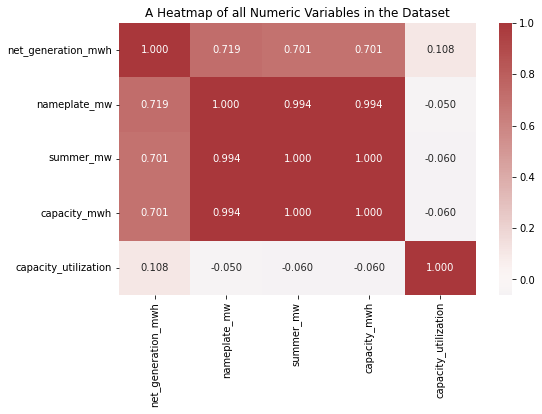

In [25]:
# correlation plot

plt.figure(figsize = [8, 5])
sb.heatmap(cal_plants_clean.corr(), annot = True, fmt = '.3f',
           cmap = 'vlag', center = 0)
plt.title("A Heatmap of all Numeric Variables in the Dataset")

All the numeric variables are highly correletad with values as high as 0.994 for relationships between 2 different numeric variables, however, the capacity utilization  has pretty low correlation. This could mean that some of the plants were not utilized as much as they should, or they typically consumed more power from the grid than they generated within the period of review.

### How does the net generation of each category of plant size vary in a Box Plot?

Text(0.5, 1.0, 'A Boxplot of Nameplate (MW) for Various Plant Categories')

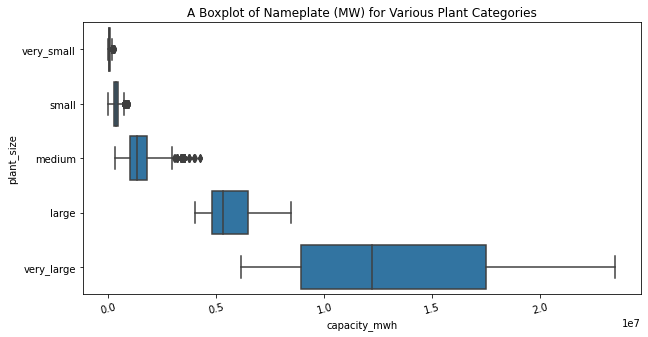

In [40]:

plt.figure(figsize=[10,5])
sb.boxplot(data=cal_plants_clean, y='plant_size', x='capacity_mwh', color=color)
plt.xticks(rotation=15);
plt.title("A Boxplot of Nameplate (MW) for Various Plant Categories")

The very large plants have significantly higher capacity than the rest of the plant categories.

### How does the net generation of each category of plant size vary in a Histogram Plot?


Text(0.5, 1.0, 'Facet Grid Plot of Net Generation (MWh) for Various Plant Sizes')

<Figure size 1080x1080 with 0 Axes>

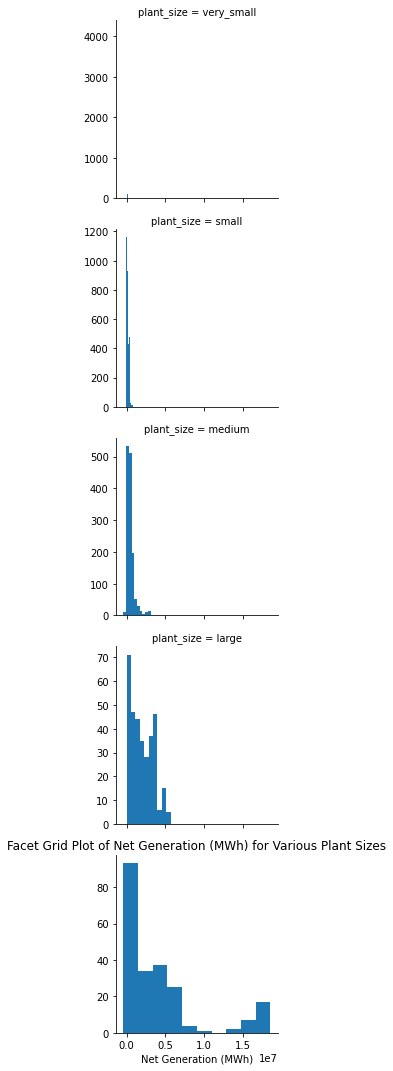

In [59]:

plt.figure(figsize=[15,15])
g = sb.FacetGrid(data = cal_plants_clean, col = 'plant_size', col_wrap=1, sharey=False)
g.map(plt.hist, 'net_generation_mwh');
plt.xlabel('Net Generation (MWh)')
plt.title('Facet Grid Plot of Net Generation (MWh) for Various Plant Sizes', loc='center')

From the charts above, only the very large plants had net generation (MWh) for either ends of the scale.

### How does the capacity (MWh) vary with each category of plant size?


Text(0.5, 1.0, 'Facet Grid Plot of Summer (MW) for Various Plant Sizes')

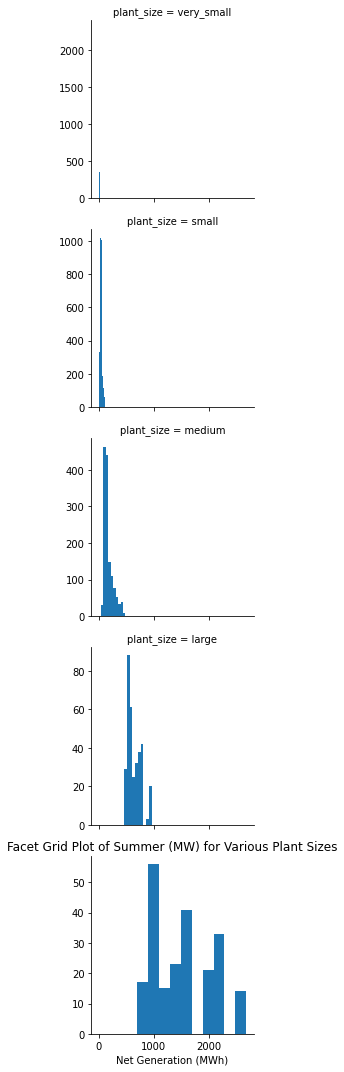

In [60]:
g = sb.FacetGrid(data = cal_plants_clean, col = 'plant_size', col_wrap=1, sharey=False)
g.map(plt.hist, 'summer_mw');
plt.xlabel('Net Generation (MWh)')
plt.title('Facet Grid Plot of Summer (MW) for Various Plant Sizes', loc='center')

Here, it can be observed that the counts of the very small and small plants were higher than the rest of the plants.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> From the PairGrid of the numeric variables, it is pretty obvious that the variables net_generation_mwh, nameplate_mw, summer_mw, capacity_mwh) are highly correlated.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Also from the Heatmap, there is a high level of correlation of the dataset of over 70%, except for the capacity utilization data whihc has some negative correlation.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [ ]:
# convertyear to string to prevent it from being included in the correlation plot
cal_plants_clean['year'] = cal_plants_clean['year'].astype(int)

### 

This is a plot of Net Generation (MWh) against plant size.  It appears that the large and very large plants had major contribution to the California Electricity Grid in MWh within the period of review. 

### What category of plants generated the most over the years

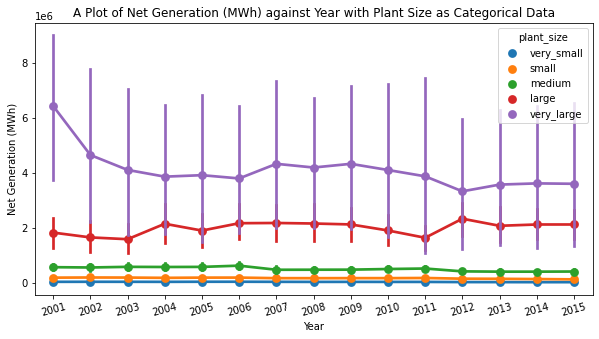

In [ ]:
plt.figure(figsize= [10,5])
sb.pointplot(data = cal_plants_clean, x = 'year', y = 'net_generation_mwh', hue='plant_size')
plt.xlabel('Year')
plt.ylabel('Net Generation (MWh)')
plt.xticks(rotation=15);
plt.title("A Plot of Net Generation (MWh) against Year with Plant Size as Categorical Data");

Over the years, the very large power plant generated more power to the California power grid

### How did the capacity of the plants vary on a yearly basis?

Text(0.5, 1.0, 'A Plot of Nameplate (MW) against Year with Plant Size as Categorical Data')

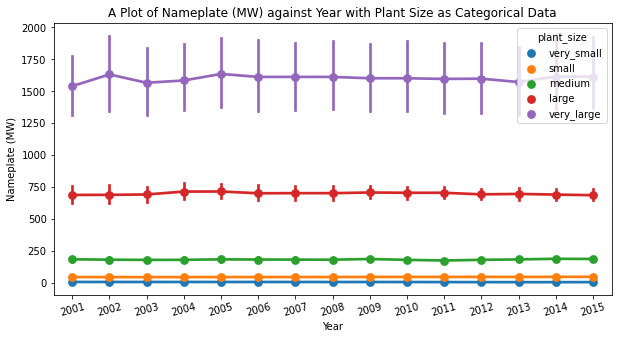

In [ ]:
plt.figure(figsize= [10,5])
sb.pointplot(data = cal_plants_clean, x = 'year', y = 'nameplate_mw', hue='plant_size')
plt.xlabel('Year')
plt.ylabel('Nameplate (MW)')
plt.xticks(rotation=15);
plt.title("A Plot of Nameplate (MW) against Year with Plant Size as Categorical Data")

The plants maintained almost the same Nameplate Capacity (MW) for most of the years save for slight increases in some years like 2001 to 2002 for the very large plants, and 2003 to 2004 for the large plants.

### What category of plant got utilized more?

Text(0.5, 1.0, 'A Plot of Capacity (MWh) against Year with Plant Size as Categorical Data')

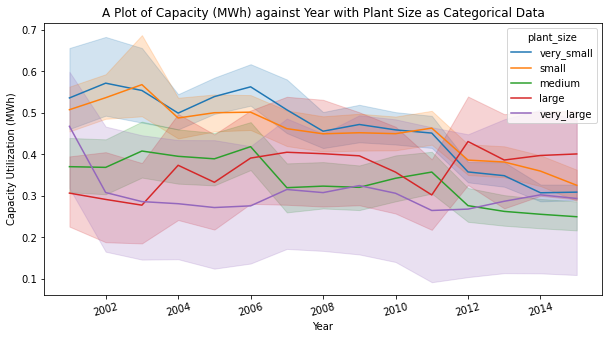

In [ ]:
plt.figure(figsize= [10,5])
sb.lineplot(data = cal_plants_clean, x = 'year', y = 'capacity_utilization', hue='plant_size');
plt.xlabel('Year')
plt.ylabel('Capacity Utilization (MWh)')
plt.xticks(rotation=15);
plt.title("A Plot of Capacity (MWh) against Year with Plant Size as Categorical Data")

Over all, the very small plants were more utilized than the rest of the plants especially in 2006 and the preceeding years.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?


> From the charts above, it was observed that the Net Generation (MWh) especially for the large and very large plants varied largely in years 2002, 2004, 2006, and 2012 in comparison with the medium, small, and very small plants, however, the nameplate capacity of the plants have remained the same, this could be due to lack of incentives for investment, perhaps because of under utilization of the existing plants.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> It was surprising to find out that the large plants had much lower capacity utilization (MWh), this is could be due to the high adoption of solar panels by residential customers in various parts of California. It would be important to take a look at the tariffs of the very large plants, or other reasons that could be an impediment to deploying them more.

## Conclusions
The steps above shows a detailed analysis of the generation of California power plants from 2001 to 2015. The data was wrangled and analysed. The analysis showed the following:

1. The dataset has quite a large number plants in the very_small range. The numbers begin to decline as the capacity rises. 
2. The very small plants consists of about 53%, the small plants are 32%, medium, 11%, large, 3%, and very large, 2%.
3. There is a pretty direct relationship. The summer capacity is almost equal to the nominal nameplate capcity.
4. The power plants with the highest net generation (MWh) have a pretty large capacity of about 2,300 MW compared to the remaining plants.
5. The capacity utilization has pretty low correlation. This could mean that some of the plants were not utilized as much as they should, or they typically consumed more power from the grid than they generated within the period of review.